In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

In [2]:
dim = 3 # data dimension
numsel = 2 # total selection
clf_depth = 3 # tree_depth

In [3]:
feat_cat = ['PEMLR', 'SS_YN']

In [4]:
outpostfix = f"dim-{dim}-sel-{numsel}-depth-{clf_depth}"

In [5]:
df = pd.read_csv(f"input/dim-{dim}/seltrain20num{dim}each20.csv")

In [6]:
for v in feat_cat:
    df[v] = df[v].astype('category')

In [7]:
df.head()

,A_AGE,PEMLR,SS_YN,class
0,24,1,2,0
1,58,7,2,0
2,24,1,2,0
3,40,7,2,0
4,24,1,2,0


In [8]:
one_hot_data = pd.get_dummies(df[feat_cat], drop_first=True)
X = df.iloc[:,0:-(len(feat_cat)+1)].join(one_hot_data)
y = df['class']

In [9]:
X.columns.values

array(['A_AGE', 'PEMLR_1', 'PEMLR_2', 'PEMLR_3', 'PEMLR_4', 'PEMLR_5',
       'PEMLR_6', 'PEMLR_7', 'SS_YN_1', 'SS_YN_2'], dtype=object)

In [10]:
clf = DecisionTreeClassifier(max_depth=clf_depth, random_state=0)

In [11]:
clf.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [12]:
score = clf.score(X, y)
y_pred = clf.predict(X)
err_ind = (y_pred != y.to_numpy().flatten()).astype(int)
error = np.count_nonzero(err_ind)
accuracy = (1-error/len(y_pred))*100

In [13]:
df_pred = pd.DataFrame({'i': range(1,101)})
df_pred['y_true'] = df[['class']]
df_pred['y_pred'] = y_pred
df_pred['e'] = err_ind
df_pred.to_csv(f"output/pred-1hot-{outpostfix}.csv", index=False)

In [14]:
sumheader = ['error', 'accuracy', 'score']
summary = [{'error': error, 'accuracy': accuracy, 'score': score}]
with open(f"output/summary-1hot-{outpostfix}.csv", 'w') as file:
    writer = csv.DictWriter(file, fieldnames=sumheader)
    writer.writeheader()
    for row in summary:
        writer.writerow(row) 

In [15]:
print(f"Error = {error} | Accuracy = {accuracy} | Score = {score}")

Error = 55 | Accuracy = 44.99999999999999 | Score = 0.45


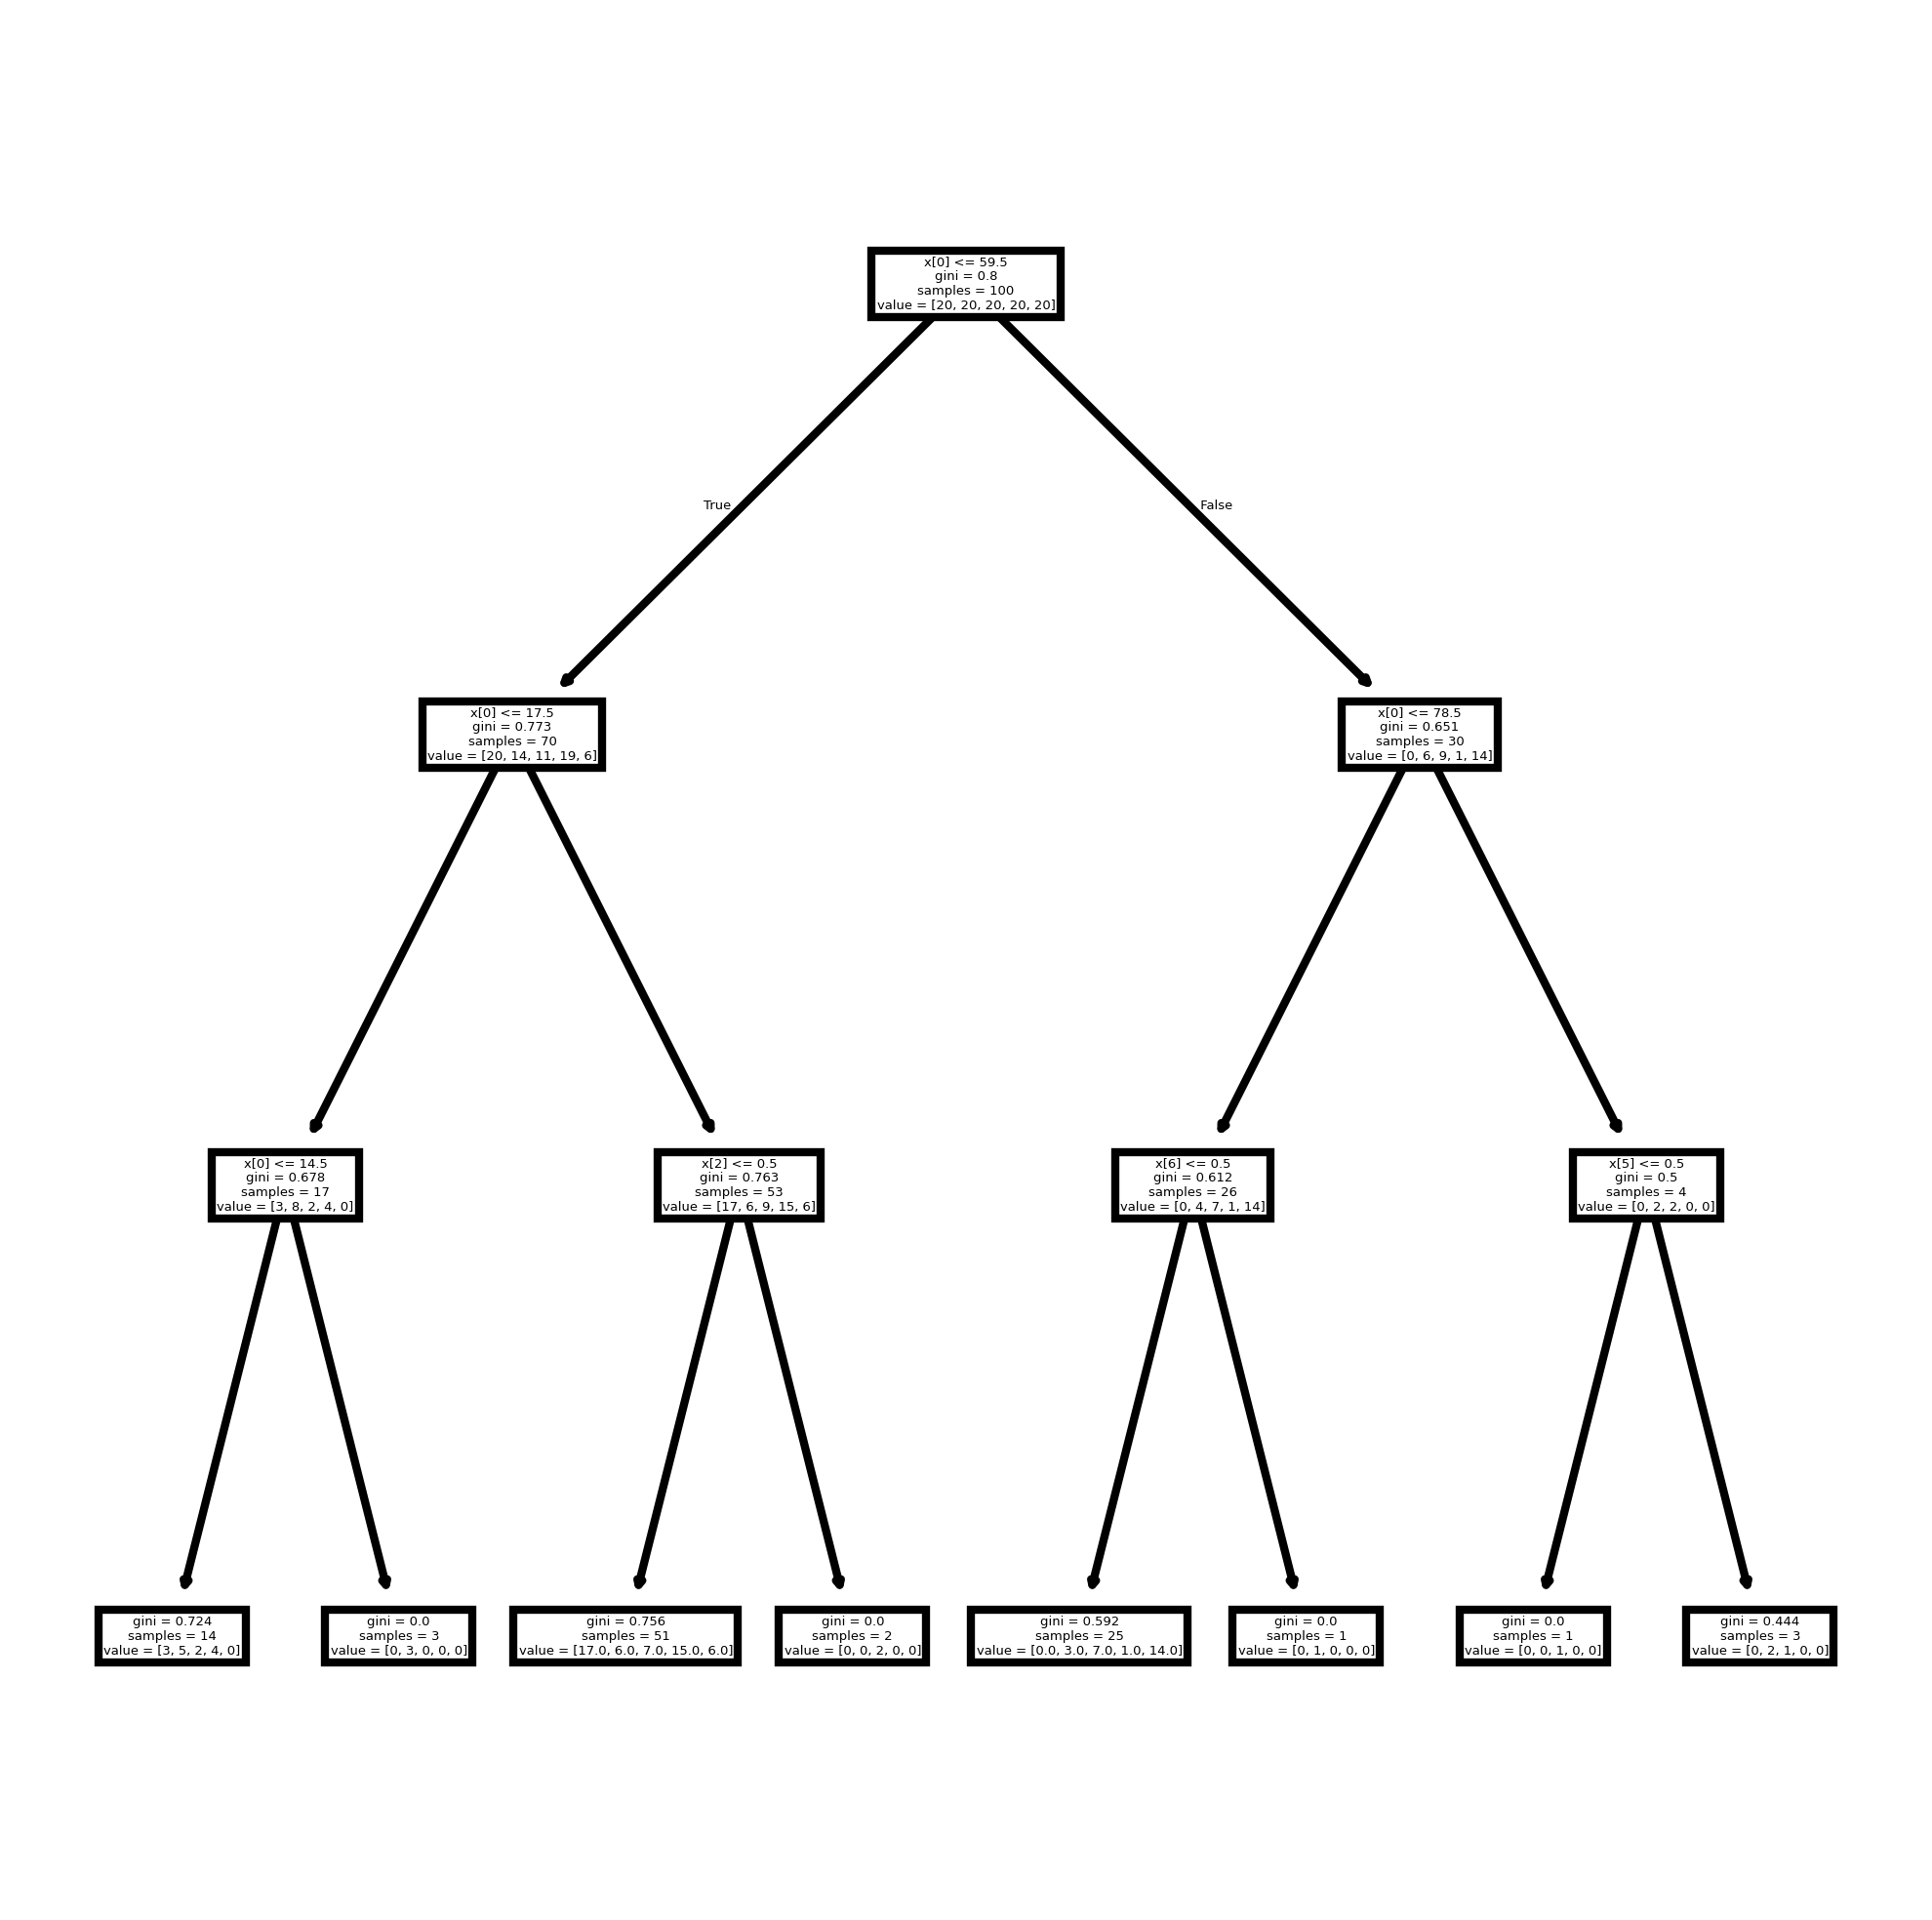

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=600)
tree.plot_tree(clf);
fig.savefig(f"images/plottreedefault-1hot-{outpostfix}.png")